In [1]:
pip install scikit-learn

In [20]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
airPol = pd.read_csv('/content/newdatajsonfortest.csv', encoding='utf-8')

In [5]:
airPol.describe()

,numberofpop,city_heights,busStations,num_fact,pol_fact,amount_of_pol,aqi_global,cars,trees,lat,lan
count,900.000000,916.000000,824.000000,1000.000000,1000.000000,1000.000000,1000.000000,812.000000,1000.000000,1000.000000,1000.000000
mean,9972.968889,193.655022,30.538835,0.204000,0.188000,0.540000,62.104000,4175.457949,7348.365000,32.202397,35.063415
std,45502.162934,229.302246,110.992248,1.177187,1.126021,3.634227,5.560945,18716.388330,10813.918665,0.660505,0.302203
min,61.000000,-350.000000,1.000000,0.000000,0.000000,0.000000,47.000000,24.516686,0.000000,29.581244,34.283954
25%,588.250000,49.750000,2.000000,0.000000,0.000000,0.000000,58.000000,251.532750,2704.500000,31.773517,34.863749
50%,919.000000,103.500000,4.000000,0.000000,0.000000,0.000000,61.000000,437.414890,5304.000000,32.283482,35.027499
75%,2103.500000,293.250000,13.000000,0.000000,0.000000,0.000000,66.000000,745.102588,8060.000000,32.753113,35.278830
max,981711.000000,1231.000000,2258.000000,19.000000,18.000000,62.000000,76.000000,300861.000000,223028.000000,33.269882,35.839165


In [7]:
Cities =airPol[['hebname']]
Population =airPol[['numberofpop']]
busStations=airPol[['busStations']]
avg_height=airPol[['city_heights']]
factory=airPol[['num_fact']]
pol_factory=airPol[['pol_fact']]
pol_factory=airPol[['amount_of_pol']]
trees=airPol[['trees']]
aqi=airPol[['cars']]
aqi=airPol[['aqi_global']]

In [8]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
numeric_cols = airPol.select_dtypes(include=['number']).columns
airPol[numeric_cols] = knn_imputer.fit_transform(airPol[numeric_cols])


In [9]:
airPol.describe()

,numberofpop,city_heights,busStations,num_fact,pol_fact,amount_of_pol,aqi_global,cars,trees,lat,lan
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9097.431200,201.283600,25.995200,0.204000,0.188000,0.540000,62.104000,3853.538581,7348.365000,32.202397,35.063415
std,43245.516105,226.209578,101.248895,1.177187,1.126021,3.634227,5.560945,16951.056141,10813.918665,0.660505,0.302203
min,61.000000,-350.000000,1.000000,0.000000,0.000000,0.000000,47.000000,24.516686,0.000000,29.581244,34.283954
25%,604.000000,51.000000,2.000000,0.000000,0.000000,0.000000,58.000000,278.300303,2704.500000,31.773517,34.863749
50%,923.500000,115.700000,4.000000,0.000000,0.000000,0.000000,61.000000,456.632422,5304.000000,32.283482,35.027499
75%,1941.250000,311.800000,10.000000,0.000000,0.000000,0.000000,66.000000,836.004599,8060.000000,32.753113,35.278830
max,981711.000000,1231.000000,2258.000000,19.000000,18.000000,62.000000,76.000000,300861.000000,223028.000000,33.269882,35.839165


In [10]:
aqi.describe()


,aqi_global
count,1000.000000
mean,62.104000
std,5.560945
min,47.000000
25%,58.000000
50%,61.000000
75%,66.000000
max,76.000000


In [11]:
frequency_table = airPol['aqi_global'].value_counts().reset_index()
frequency_table.columns = ['aqi_global', 'Count']
print(frequency_table)

    aqi_global  Count
0         60.0    111
1         61.0    105
2         58.0    101
3         71.0     87
4         59.0     85
5         62.0     70
6         70.0     51
7         57.0     38
8         66.0     37
9         63.0     36
10        64.0     32
11        68.0     28
12        69.0     27
13        72.0     27
14        65.0     26
15        54.0     24
16        53.0     21
17        67.0     20
18        56.0     18
19        55.0     17
20        50.0     11
21        52.0     10
22        51.0      8
23        47.0      4
24        76.0      2
25        49.0      1
26        48.0      1
27        73.0      1
28        74.0      1


In [12]:
frequency_table = airPol['city_heights'].value_counts().reset_index()
frequency_table.columns = ['city_heights', 'Count']
print(frequency_table)

     city_heights  Count
0            52.0     11
1            37.0     11
2            62.0     10
3            63.0     10
4            51.0      9
..            ...    ...
496         105.6      1
497         414.0      1
498         248.0      1
499         361.0      1
500         511.0      1

[501 rows x 2 columns]


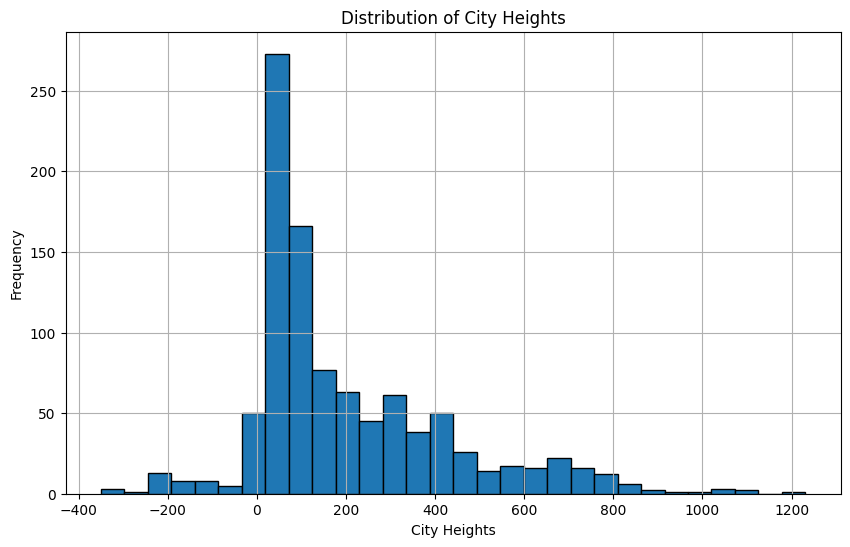

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(airPol['city_heights'], bins=30, edgecolor='black')
plt.xlabel("City Heights")
plt.ylabel("Frequency")
plt.title("Distribution of City Heights")
plt.grid(True)
plt.show()

In [14]:
frequency_table = airPol['num_fact'].value_counts().reset_index()
frequency_table.columns = ['num_fact', 'Count']
print(frequency_table)

    num_fact  Count
0        0.0    926
1        1.0     41
2        2.0     11
3        4.0      8
4        3.0      4
5       10.0      3
6        5.0      3
7       19.0      1
8        6.0      1
9        9.0      1
10      18.0      1


/tmp/ipython-input-2690470787.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y=frequency_table['num_fact'], x=frequency_table['Count'], color="blue",ci=None)


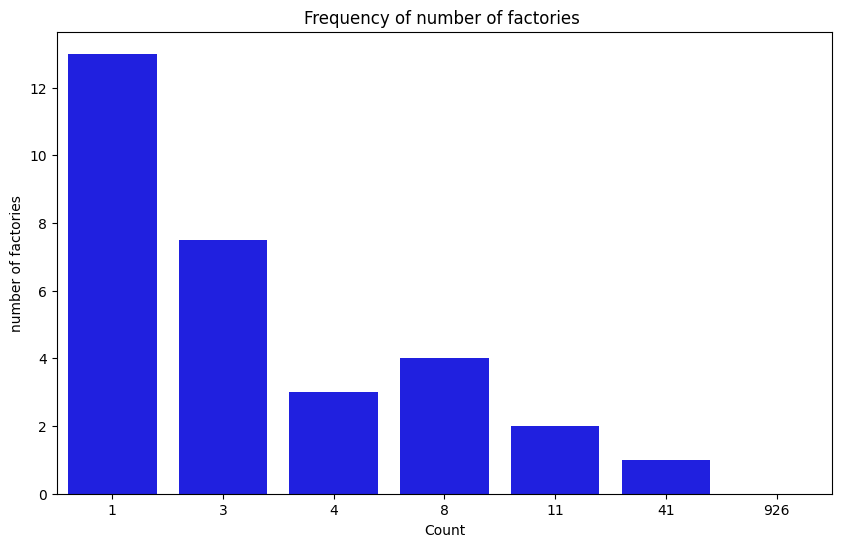

In [15]:

plt.figure(figsize=(10, 6))
sns.barplot(y=frequency_table['num_fact'], x=frequency_table['Count'], color="blue",ci=None)
plt.ylabel("number of factories")
plt.xlabel("Count")
plt.title("Frequency of number of factories ")
plt.show()

In [17]:
frequency_table = airPol['pol_fact'].value_counts().reset_index()
frequency_table.columns = ['pol_fact', 'Count']
print(frequency_table)

   pol_fact  Count
0       0.0    933
1       1.0     35
2       2.0     12
3       4.0      6
4       3.0      4
5       5.0      3
6      18.0      2
7      10.0      2
8       8.0      2
9       6.0      1


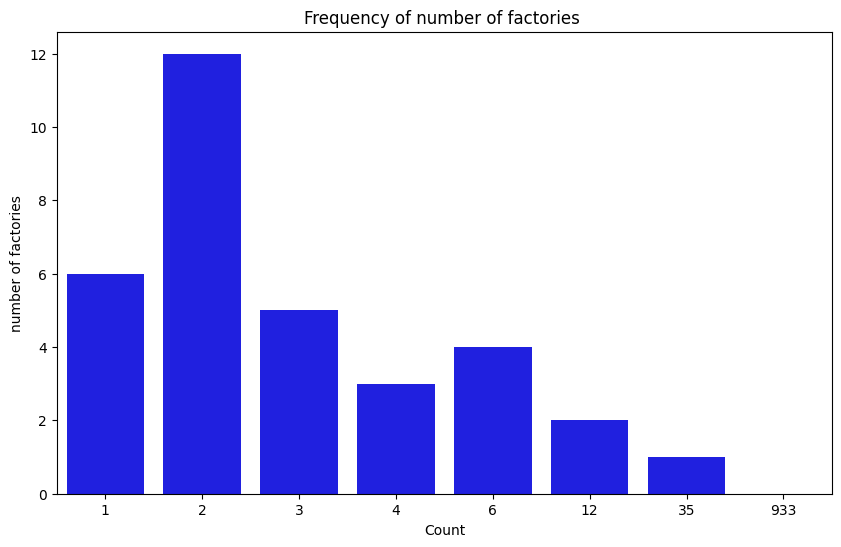

In [21]:

plt.figure(figsize=(10, 6))
sns.barplot(y=frequency_table['pol_fact'], x=frequency_table['Count'], color="blue",errorbar=None)
plt.ylabel("number of factories")
plt.xlabel("Count")
plt.title("Frequency of number of factories ")
plt.show()

In [22]:
frequency_table = airPol['cars'].value_counts().reset_index()
frequency_table.columns = ['cars', 'Count']
print(frequency_table)

            cars  Count
0     278.300303      6
1     517.652022      5
2     498.392841      5
3     647.860273      4
4    6517.000000      3
..           ...    ...
945   479.281614      1
946   476.662950      1
947   101.095275      1
948   220.878703      1
949  1702.214508      1

[950 rows x 2 columns]


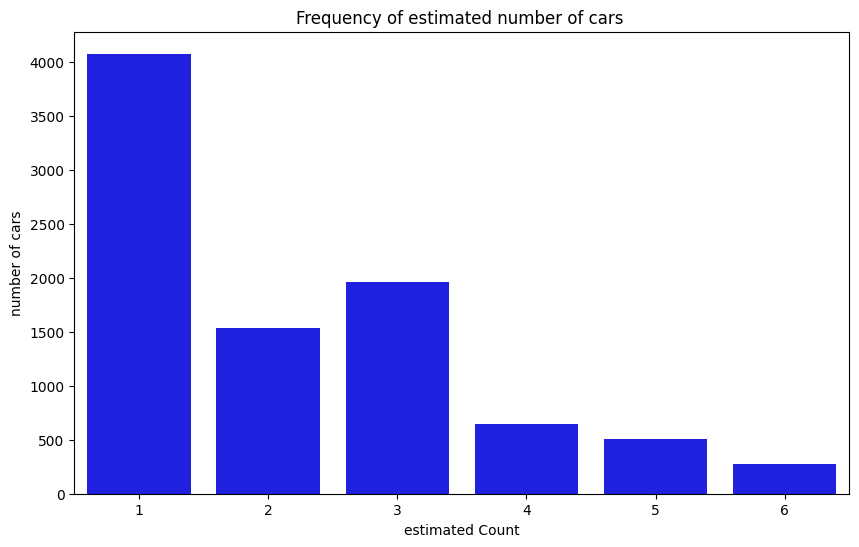

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(y=frequency_table['cars'], x=frequency_table['Count'], color="blue",errorbar=None)
plt.ylabel("number of cars")
plt.xlabel("estimated Count")
plt.title("Frequency of estimated number of cars ")
plt.show()

In [24]:
frequency_table = airPol['busStations'].value_counts().reset_index()
frequency_table.columns = ['busStations', 'Count']
print(frequency_table)

     busStations  Count
0            1.0    203
1            2.0    126
2            3.0     78
3            4.0     59
4            5.0     45
..           ...    ...
162        228.0      1
163         14.4      1
164          5.4      1
165          6.4      1
166          5.8      1

[167 rows x 2 columns]


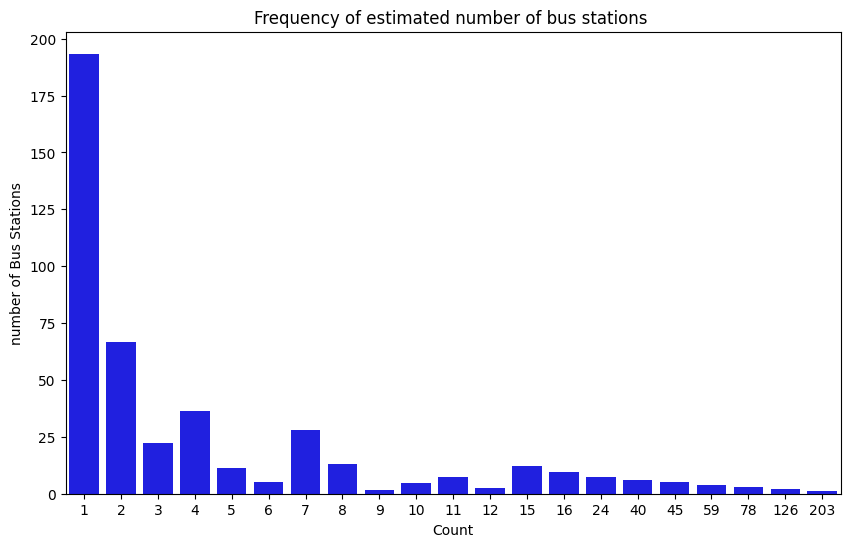

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(y=frequency_table['busStations'], x=frequency_table['Count'], color="blue",errorbar=None)
plt.ylabel("number of Bus Stations")
plt.xlabel("Count")
plt.title("Frequency of estimated number of bus stations ")
plt.show()

In [26]:
import scipy.stats as stats

In [27]:
corr, p_value = stats.pearsonr(airPol['busStations'], airPol['aqi_global'])
print(f"Pearson Correlation: {corr:.2f}, p-value: {p_value:.5f}")

Pearson Correlation: -0.01, p-value: 0.68907


In [28]:
corr, p_value = stats.pearsonr(airPol['cars'], airPol['aqi_global'])
print(f"Pearson Correlation: {corr:.2f}, p-value: {p_value:.5f}")

Pearson Correlation: -0.04, p-value: 0.18341


In [30]:
corr, p_value = stats.pearsonr(airPol['pol_fact'], airPol['aqi_global'])
print(f"Pearson Correlation: {corr:.2f}, p-value: {p_value:.5f}")

Pearson Correlation: -0.03, p-value: 0.28534


In [31]:
corr, p_value = stats.pearsonr(airPol['city_heights'], airPol['aqi_global'])
print(f"Pearson Correlation: {corr:.2f}, p-value: {p_value:.5f}")


Pearson Correlation: 0.18, p-value: 0.00000


In [32]:
corr, p_value = stats.pearsonr(airPol['numberofpop'], airPol['aqi_global'])
print(f"Pearson Correlation: {corr:.2f}, p-value: {p_value:.5f}")


Pearson Correlation: -0.04, p-value: 0.24174


In [35]:
corr, p_value = stats.pearsonr(airPol['trees'], airPol['aqi_global'])
print(f"Pearson Correlation: {corr:.2f}, p-value: {p_value:.5f}")


Pearson Correlation: 0.07, p-value: 0.02367


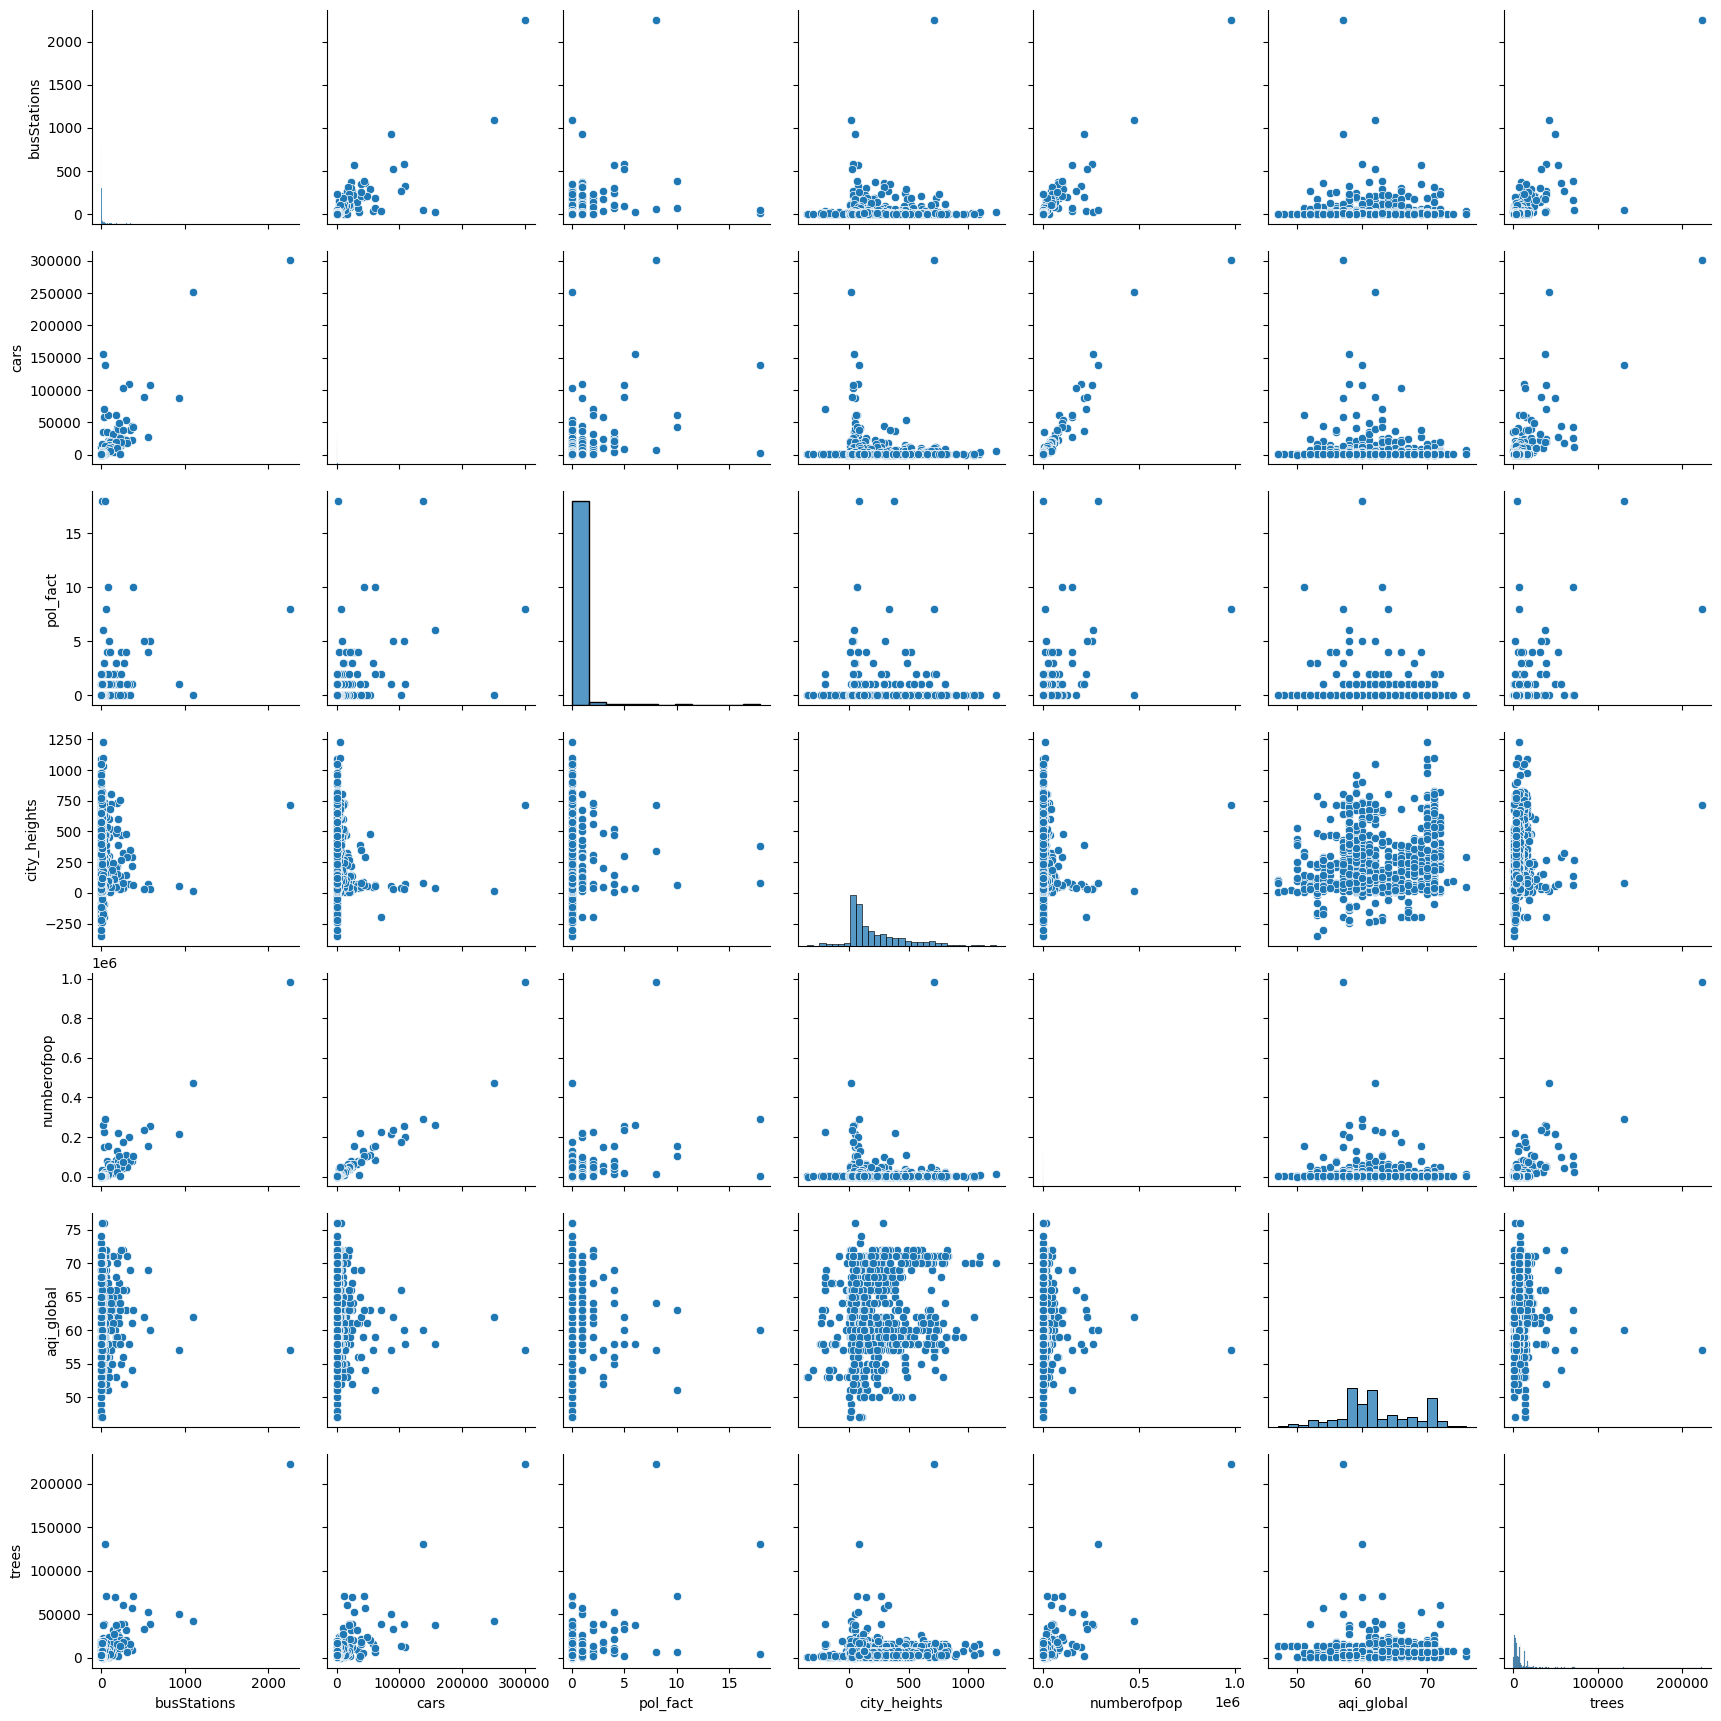

In [36]:
sns.pairplot(airPol[['busStations', 'cars', 'pol_fact','city_heights','numberofpop', 'aqi_global','trees']])
plt.show()

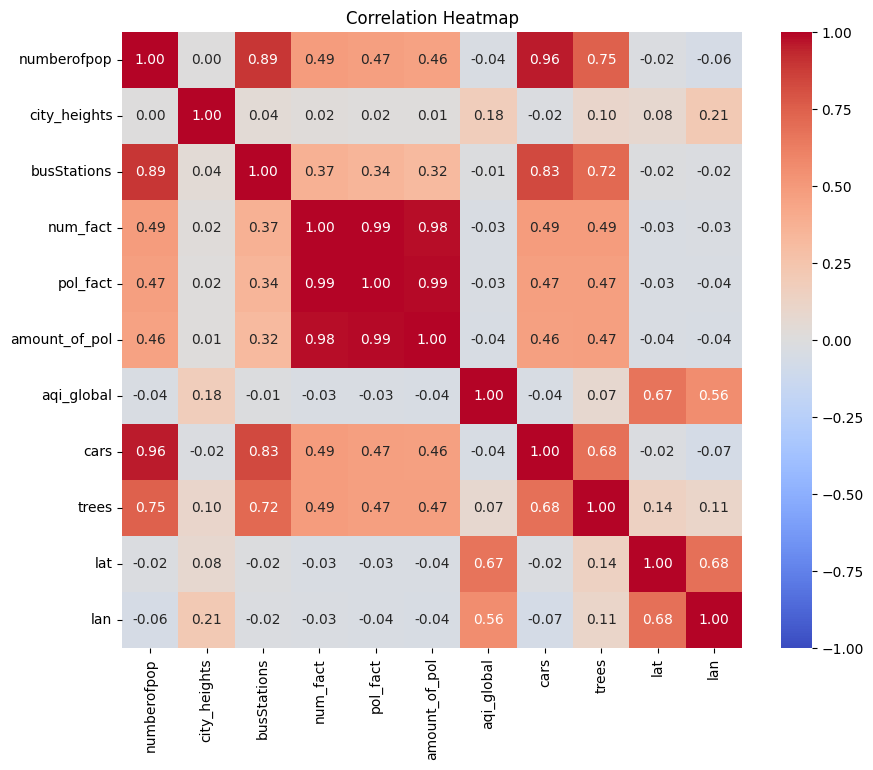

In [37]:
numeric_features = airPol.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(10, 8))  # גודל הגרף

# יצירת מפת חום עם ערכי המתאם
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)

plt.title("Correlation Heatmap")
plt.show()